## hetrec2011-lastfm-2k EDA

In [62]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

### user_artists.dat
This file contains the artists listened by each user.
        
It also provides a listening count for each [user, artist] pair

userID \t artistID \t weight
2	51	13883

In [63]:
user_artists = pd.read_csv("/Users/polina/PycharmProjects/recommendation_system/recommendation-system/data/raw/hetrec2011-lastfm-2k/user_artists.dat", sep="\t")

In [64]:
user_artists_report = ProfileReport(user_artists, title="User-artists dataset report")
user_artists_report.to_file("../reports/user_artists_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### user_friends.dat
These files contain the friend relations between users in the database.

userID \t friendID
2	275

In [65]:
user_friends = pd.read_csv("/Users/polina/PycharmProjects/recommendation_system/recommendation-system/data/raw/hetrec2011-lastfm-2k/user_friends.dat", sep="\t")

In [66]:
user_friends_report = ProfileReport(user_friends, title="User-friends dataset report")
user_friends_report.to_file("../reports/user_friends_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### user_taggedartists-timestamps.dat
These files contain the tag assignments of artists provided by each particular user.
        
They also contain the timestamps when the tag assignments were done.

user_taggedartists-timestamps.dat

userID \t artistID \t tagID \t timestamp
2	52	13	1238536800000

In [67]:
user_taggedartists = pd.read_csv("/Users/polina/PycharmProjects/recommendation_system/recommendation-system/data/raw/hetrec2011-lastfm-2k/user_taggedartists-timestamps.dat", sep="\t")

In [68]:
user_taggedartists_report = ProfileReport(user_taggedartists, title="User tagged-artists dataset report")
user_taggedartists_report.to_file("../reports/user_taggedartists_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### tags.dat
This file contains the set of tags available in the dataset.

tagID \t tagValue
1	metal

In [69]:
tags = pd.read_csv("/Users/polina/PycharmProjects/recommendation_system/recommendation-system/data/raw/hetrec2011-lastfm-2k/tags.dat", sep="\t", encoding='latin-1')

In [70]:
tags_report = ProfileReport(tags, title="Tags dataset report")
tags_report.to_file("../reports/tags_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### artists.dat
This file contains information about music artists listened and tagged by the users.

id \t name \t url \t pictureURL

Example:
707	Metallica	http://www.last.fm/music/Metallica	http://userserve-ak.last.fm/serve/252/7560709.jpg

In [71]:
artists = pd.read_csv("/Users/polina/PycharmProjects/recommendation_system/recommendation-system/data/raw/hetrec2011-lastfm-2k/artists.dat", sep="\t", encoding='latin-1')

In [72]:
artists_report = ProfileReport(artists, title="Artists dataset report")
artists_report.to_file("../reports/artists_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### fixing skeweness of user_artists.weight

In [73]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [74]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

In [75]:
user_artists.weight = pd.Series((qt.fit_transform(np.array(user_artists.weight).reshape(-1, 1))).flatten())

<Axes: xlabel='weight', ylabel='Count'>

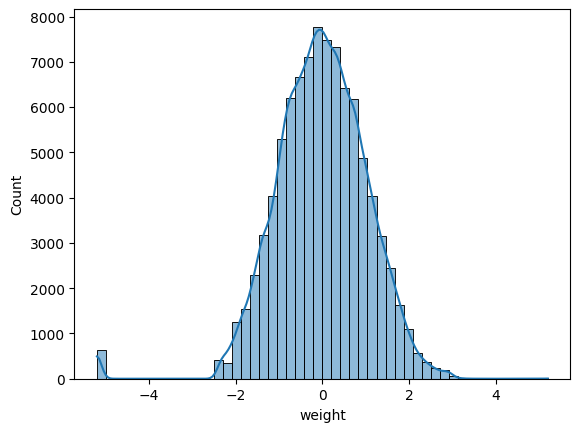

In [76]:
sns.histplot(user_artists.weight, bins = 50, kde = True)

### deleting missing values from artists

In [77]:
artists = artists.dropna()